# Data Exploration of the 911 calls

Emergency (911) Calls: Fire, Traffic, EMS for Montgomery County, PA

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import matplotlib.pyplot as plt
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/montcoalert/911.csv


In [2]:
df = pd.read_csv('/kaggle/input/montcoalert/911.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [4]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [5]:
df['zip'].value_counts().head(10)

19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
19002.0    21070
19468.0    18939
19046.0    17886
19454.0    17661
19090.0    17377
Name: zip, dtype: int64

Top 30 caller townships

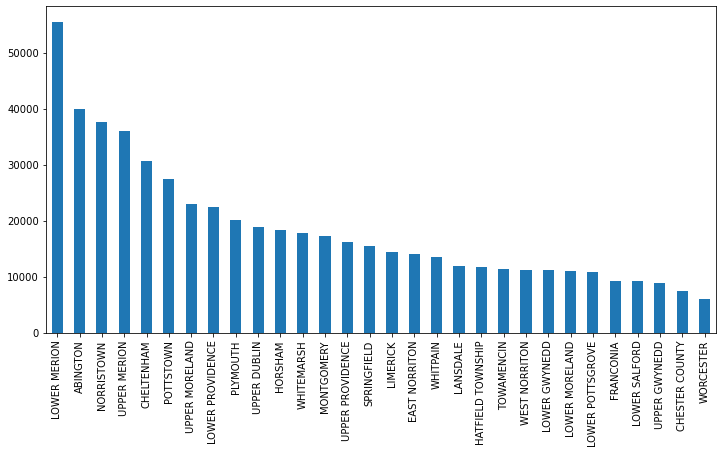

In [6]:
plt.figure(figsize=(12,6))
df['twp'].value_counts().head(30).plot.bar()

In [7]:
# Title, reason for call, is a string which has main catagory (emmergency, fire and traffic)
# and detailes of each is also given after the colon. Let's separate and make more colomns containg reasons (main & detail)

def spliter0(text):
    return text.split(":")[0]
def spliter1(text):
    return text.split(":")[1]


In [8]:
df['reason_main'] = df.apply(lambda x: spliter0(x['title']), axis=1)
df['reason_detail'] = df.apply(lambda x: spliter1(x['title']), axis=1)
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason_main,reason_detail
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,GAS-ODOR/LEAK
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,CARDIAC EMERGENCY
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,DIZZINESS


In [9]:
df['reason_main'].value_counts()

EMS        332692
Traffic    230208
Fire       100622
Name: reason_main, dtype: int64

In [10]:
df['reason_detail'].value_counts()

 VEHICLE ACCIDENT -     148372
 DISABLED VEHICLE -      47909
 FIRE ALARM              38452
 VEHICLE ACCIDENT        36377
 FALL VICTIM             34683
                         ...  
 BOMB THREAT                 2
 ANIMAL COMPLAINT            1
 FOOT PATROL                 1
 HIT + RUN                   1
 PRISONER IN CUSTODY         1
Name: reason_detail, Length: 95, dtype: int64

In [11]:
import seaborn as sns

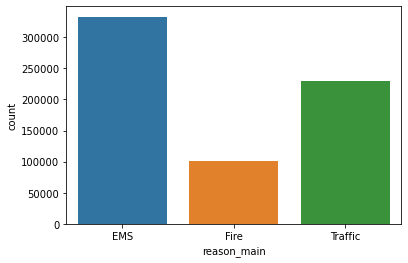

In [12]:
sns.countplot(df['reason_main'], color=None)

Text(0, 0.5, 'Call counts')

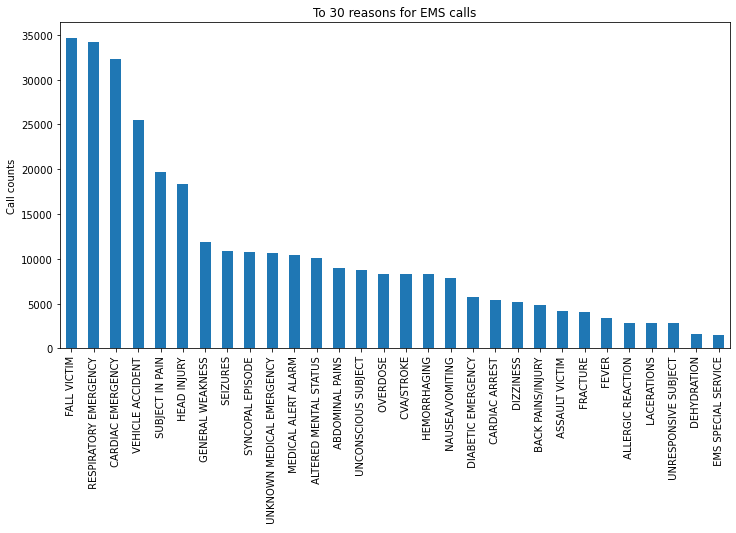

In [13]:
plt.figure(figsize=(12, 6))
df_ems = df[df['reason_main']=='EMS']
df_ems['reason_detail'].value_counts()
df_ems_top10 = df_ems['reason_detail'].value_counts().head(30)
df_ems_top10.plot.bar()
plt.title('To 30 reasons for EMS calls')
plt.ylabel('Call counts')


Text(0, 0.5, 'Call counts')

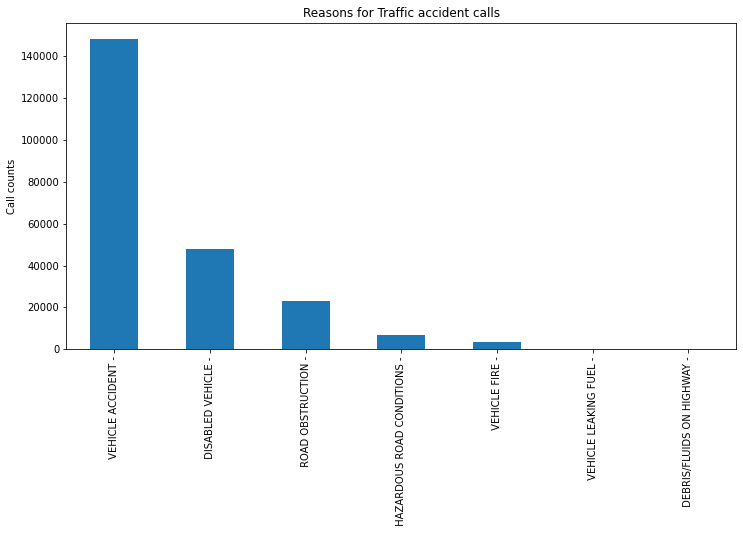

In [14]:
plt.figure(figsize=(12,6))
df_trf = df[df['reason_main']=='Traffic']
df_trf['reason_detail'].value_counts()
df_trf = df_trf['reason_detail'].value_counts()
df_trf.plot.bar()
plt.title('Reasons for Traffic accident calls')
plt.ylabel('Call counts')

Text(0, 0.5, 'Call counts')

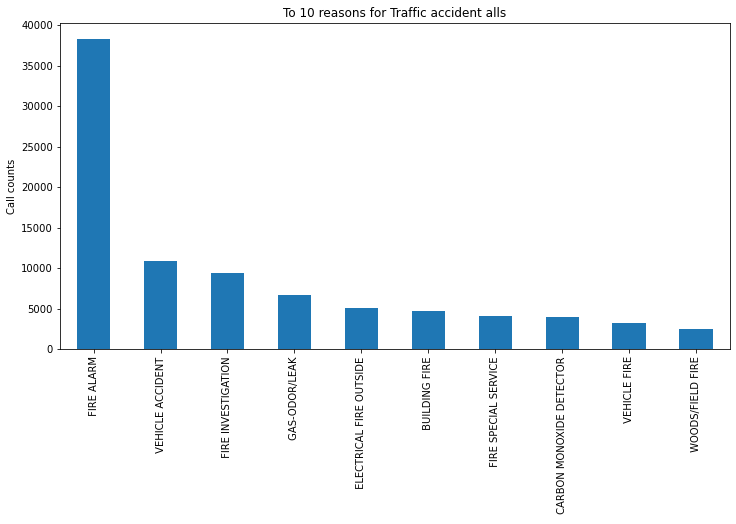

In [15]:
plt.figure(figsize=(12,6))
df_fire = df[df['reason_main']=='Fire']
df_fire['reason_detail'].value_counts()
df_fire_top10 = df_fire['reason_detail'].value_counts().head(10)
df_fire_top10.plot.bar()
plt.title('To 10 reasons for Traffic accident alls')
plt.ylabel('Call counts')


In [16]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [17]:
df['Year'] = df['timeStamp'].dt.year
df['Hour'] = df['timeStamp'].dt.hour
df['Month'] = df['timeStamp'].dt.month
df['DayOfTheWeek']= df['timeStamp'].dt.dayofweek
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason_main,reason_detail,Year,Hour,Month,DayOfTheWeek
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY,2015,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY,2015,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,GAS-ODOR/LEAK,2015,14,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,CARDIAC EMERGENCY,2015,16,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,DIZZINESS,2015,16,12,3


In [18]:
days_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednsday', 3:'Thursday', 4:'Friday',5:'Saturday', 6:'Sunday'}
df['DayOfTheWeek']=df['DayOfTheWeek'].map(days_mapping)

In [19]:
df.tail()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason_main,reason_detail,Year,Hour,Month,DayOfTheWeek
663517,40.157956,-75.348060,SUNSET AVE & WOODLAND AVE; EAST NORRITON; 2020...,19403.0,Traffic: VEHICLE ACCIDENT -,2020-07-29 15:46:51,EAST NORRITON,SUNSET AVE & WOODLAND AVE,1,Traffic,VEHICLE ACCIDENT -,2020,15,7,Wednsday
663518,40.136306,-75.428697,EAGLEVILLE RD & BUNTING CIR; LOWER PROVIDENCE...,19403.0,EMS: GENERAL WEAKNESS,2020-07-29 15:52:19,LOWER PROVIDENCE,EAGLEVILLE RD & BUNTING CIR,1,EMS,GENERAL WEAKNESS,2020,15,7,Wednsday
663519,40.013779,-75.300835,HAVERFORD STATION RD; LOWER MERION; Station 3...,19041.0,EMS: VEHICLE ACCIDENT,2020-07-29 15:52:52,LOWER MERION,HAVERFORD STATION RD,1,EMS,VEHICLE ACCIDENT,2020,15,7,Wednsday
663520,40.121603,-75.351437,MARSHALL ST & HAWS AVE; NORRISTOWN; 2020-07-29...,19401.0,Fire: BUILDING FIRE,2020-07-29 15:54:08,NORRISTOWN,MARSHALL ST & HAWS AVE,1,Fire,BUILDING FIRE,2020,15,7,Wednsday
663521,40.015046,-75.299674,HAVERFORD STATION RD & W MONTGOMERY AVE; LOWER...,19041.0,Traffic: VEHICLE ACCIDENT -,2020-07-29 15:52:46,LOWER MERION,HAVERFORD STATION RD & W MONTGOMERY AVE,1,Traffic,VEHICLE ACCIDENT -,2020,15,7,Wednsday


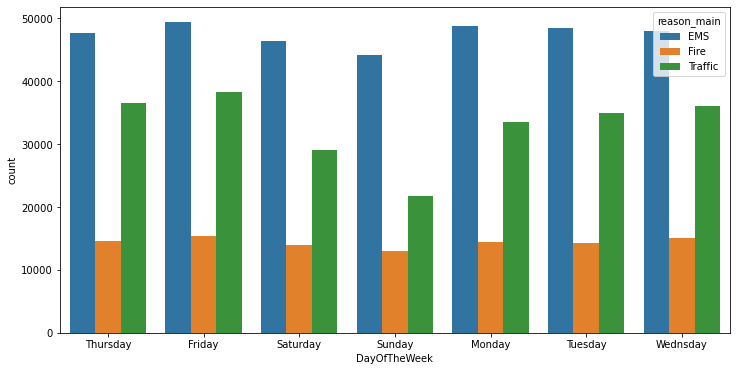

In [20]:
plt.figure(figsize=(12,6))
sns.countplot(df['DayOfTheWeek'], hue=df['reason_main'])

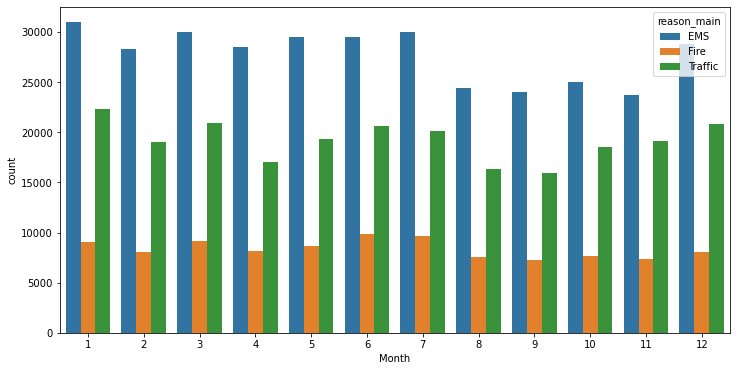

In [21]:
plt.figure(figsize=(12,6))
sns.countplot(df['Month'], hue=df['reason_main'])

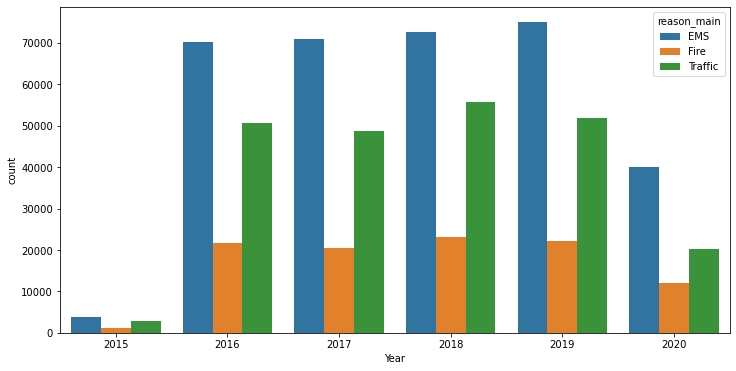

In [22]:
plt.figure(figsize=(12,6))
sns.countplot(df['Year'], hue=df['reason_main'])

In [23]:
# new dataframe for months from January to July 
# this dataframe will later be used to compare some features 
df_janJuly = []
for i in range(1, 8):
    df_i = df[df['Month'] == i]
    df_janJuly.append(df_i)
df_janJuly=pd.concat(df_janJuly)                 

In [24]:
df_janJuly.tail()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason_main,reason_detail,Year,Hour,Month,DayOfTheWeek
663517,40.157956,-75.348060,SUNSET AVE & WOODLAND AVE; EAST NORRITON; 2020...,19403.0,Traffic: VEHICLE ACCIDENT -,2020-07-29 15:46:51,EAST NORRITON,SUNSET AVE & WOODLAND AVE,1,Traffic,VEHICLE ACCIDENT -,2020,15,7,Wednsday
663518,40.136306,-75.428697,EAGLEVILLE RD & BUNTING CIR; LOWER PROVIDENCE...,19403.0,EMS: GENERAL WEAKNESS,2020-07-29 15:52:19,LOWER PROVIDENCE,EAGLEVILLE RD & BUNTING CIR,1,EMS,GENERAL WEAKNESS,2020,15,7,Wednsday
663519,40.013779,-75.300835,HAVERFORD STATION RD; LOWER MERION; Station 3...,19041.0,EMS: VEHICLE ACCIDENT,2020-07-29 15:52:52,LOWER MERION,HAVERFORD STATION RD,1,EMS,VEHICLE ACCIDENT,2020,15,7,Wednsday
663520,40.121603,-75.351437,MARSHALL ST & HAWS AVE; NORRISTOWN; 2020-07-29...,19401.0,Fire: BUILDING FIRE,2020-07-29 15:54:08,NORRISTOWN,MARSHALL ST & HAWS AVE,1,Fire,BUILDING FIRE,2020,15,7,Wednsday
663521,40.015046,-75.299674,HAVERFORD STATION RD & W MONTGOMERY AVE; LOWER...,19041.0,Traffic: VEHICLE ACCIDENT -,2020-07-29 15:52:46,LOWER MERION,HAVERFORD STATION RD & W MONTGOMERY AVE,1,Traffic,VEHICLE ACCIDENT -,2020,15,7,Wednsday


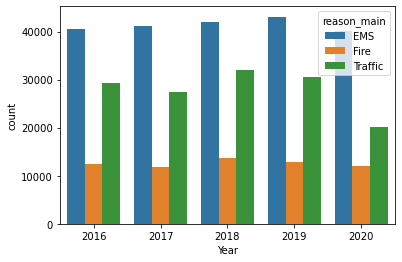

In [25]:
df_JJ = df_janJuly
sns.countplot(df_JJ['Year'], hue=df_JJ['reason_main'] )

In [26]:
byMonth = df.groupby(by='Month').count()
byMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason_main,reason_detail,Year,Hour,DayOfTheWeek
Month,,,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427,55427,55427
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027,60027,60027
4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,53671,53671,53671
5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509,57509,57509,57509
6,60034,60034,60034,52593,60034,60034,60005,60034,60034,60034,60034,60034,60034,60034
7,59832,59832,59832,52507,59832,59832,59802,59832,59832,59832,59832,59832,59832,59832
8,48359,48359,48359,42311,48359,48359,48335,48359,48359,48359,48359,48359,48359,48359
9,47213,47213,47213,41289,47213,47213,47196,47213,47213,47213,47213,47213,47213,47213


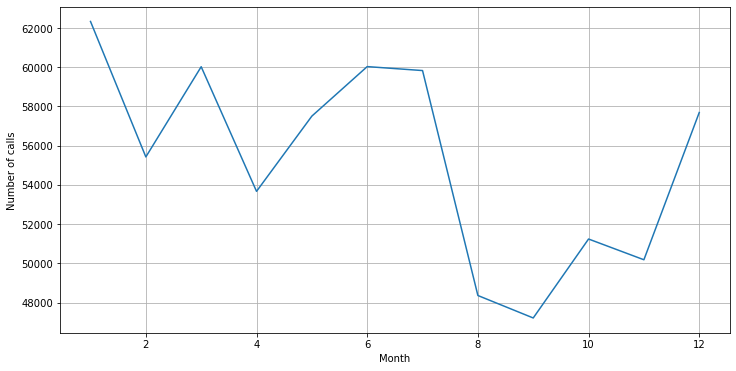

In [27]:
plt.figure(figsize=(12,6))
byMonth['reason_main'].plot()
plt.xlabel('Month')
plt.ylabel('Number of calls')
plt.grid()

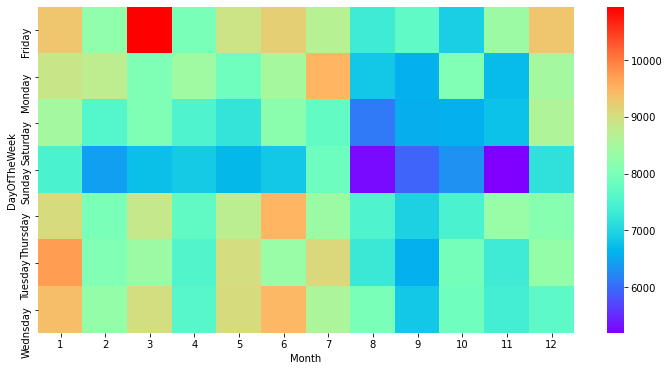

In [28]:
dayMonth = df.groupby(by=['DayOfTheWeek','Month']).count()['reason_main'].unstack()
dayMonth
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='rainbow')

In [29]:
dayHour = df.groupby(by=['DayOfTheWeek','Hour']).count()['reason_main'].unstack()
dayHour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
DayOfTheWeek,,,,,,,,,,,,,,,,,,,,,
Friday,1983,1635,1449,1296,1339,1639,2670,4143,5018,5288,...,6394,7040,7065,7113,5668,5056,4375,3913,3422,2834
Monday,1894,1571,1368,1272,1336,1844,2675,4430,5504,5724,...,5713,6289,6346,6408,5441,4488,3823,3254,2658,2072
Saturday,2447,2059,1883,1592,1451,1580,1880,2489,3457,4315,...,5421,5181,5211,5213,4980,4753,4127,3895,3226,2965
Sunday,2424,2135,1946,1614,1471,1488,1726,2408,3001,3728,...,4744,4475,4560,4505,4402,4135,3748,3161,2629,2323
Thursday,1731,1408,1426,1236,1293,1775,2816,4432,5297,5412,...,6079,6493,6375,6935,5512,4703,4045,3490,2844,2354
Tuesday,1720,1459,1322,1213,1247,1741,2784,4425,5634,5566,...,5926,6252,6495,6883,5628,4621,3845,3409,2708,2137
Wednsday,1664,1484,1259,1265,1128,1609,2668,4644,5469,5444,...,6069,6533,6745,7062,5691,4686,4116,3537,2826,2207


Text(0.5, 1.0, '911 calls')

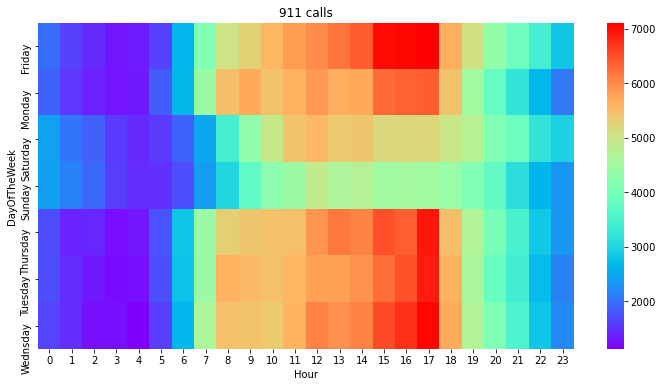

In [30]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='rainbow')
plt.title('911 calls')

# Weekend overdose
**Drug Overdose**: It looks like that overdose call coinside with what is normally considered as 'partying' time. At weekends during late/early hours of the day.  

In [31]:
df_overdose = df[df['reason_detail'] ==' OVERDOSE']

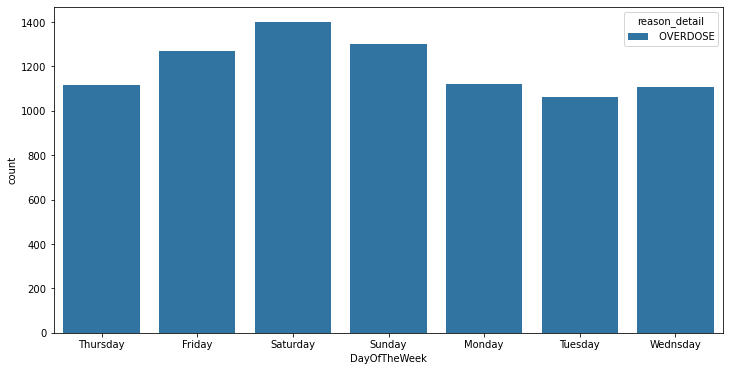

In [32]:
plt.figure(figsize=(12,6))
sns.countplot(df_overdose['DayOfTheWeek'], hue=df_overdose['reason_detail'])

Text(0.5, 1.0, 'EMS: Overdose related 911 calls')

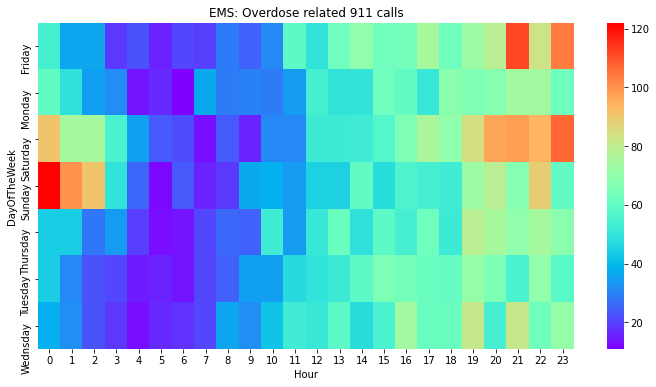

In [33]:
plt.figure(figsize=(12,6))
overdoseHour = df_overdose.groupby(by=['DayOfTheWeek','Hour']).count()['reason_detail'].unstack()
sns.heatmap(overdoseHour,cmap='rainbow')
plt.title('EMS: Overdose related 911 calls')

# Rush-hour accident
Looking at the traffic accident related calls data, it is easy to see that road accidents are more frequent during the rush hours. On the week days and especially in the afternoon when peopel are rushing home back from work. Strict traffic regulation between 600hrs-1800hrs might help reduce the 
chances of road traffic accident.

Text(0.5, 1.0, 'Traffic: Vehicle accident 911 calls')

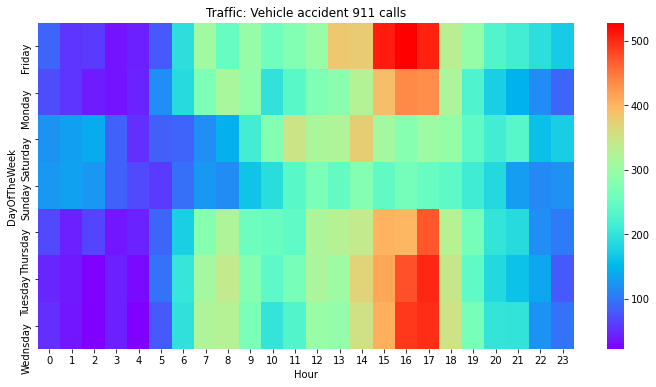

In [34]:
plt.figure(figsize=(12,6))
df_vehAcc = df[(df['reason_detail']== ' VEHICLE ACCIDENT')]
vehAccident = df_vehAcc.groupby(by=['DayOfTheWeek','Hour']).count()['reason_detail'].unstack()
sns.heatmap(vehAccident,cmap='rainbow')
plt.title('Traffic: Vehicle accident 911 calls')

# Your heart is fine in fall
Not really! I am not a health professional to make such a big claim.
But accocrding to the call data, fall season sees relatively less heart (cardiac emmergency + cardiac arrest + cva/stroke) related 911 calls. *This is a weak conclusion due to no fall-season data for the years 2015 and 2020.* 

Text(0.5, 1.0, 'EMS: Heart related 911 calls')

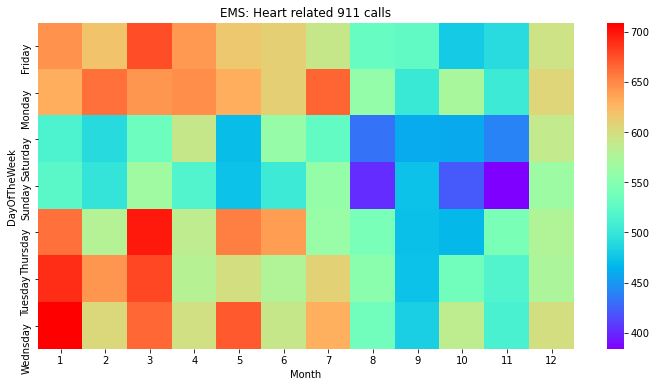

In [35]:
plt.figure(figsize=(12,6))
df_fall = df[(df['reason_detail']== ' CARDIAC EMERGENCY') | (df['reason_detail']== ' CARDIAC ARREST') | (df['reason_detail']== ' CVA/STROKE')]
fallVictims = df_fall.groupby(by=['DayOfTheWeek','Month']).count()['reason_detail'].unstack()
sns.heatmap(fallVictims,cmap='rainbow')
plt.title('EMS: Heart related 911 calls')

# COVID-19 & respiratory emergency calls
For fair comparison, only the data for months January to July are considered, because the data for year 2020 is upto and including the month July. Unsurprisingly, 2020 sees the most respiratory related emergency calls. Obviously more people called 911 on winter as well for respiratory emergency. 

Text(0.5, 1.0, 'EMS: Respiratory calls')

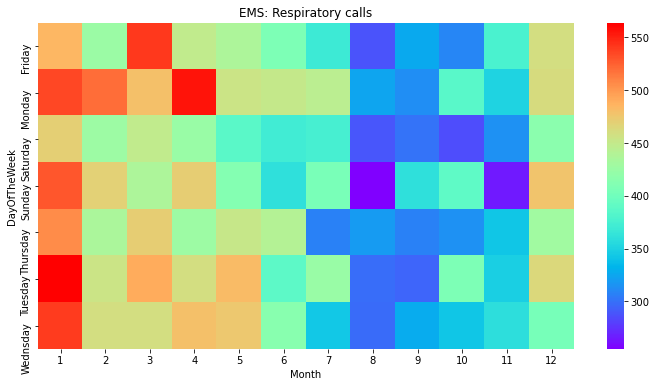

In [36]:
plt.figure(figsize=(12,6))
df_vehAcc = df[(df['reason_detail']== ' RESPIRATORY EMERGENCY')]
vehAccident = df_vehAcc.groupby(by=['DayOfTheWeek','Month']).count()['reason_detail'].unstack()
sns.heatmap(vehAccident,cmap='rainbow')
plt.title('EMS: Respiratory calls')

Text(0.5, 1.0, 'Respiratory Emergency Calls')

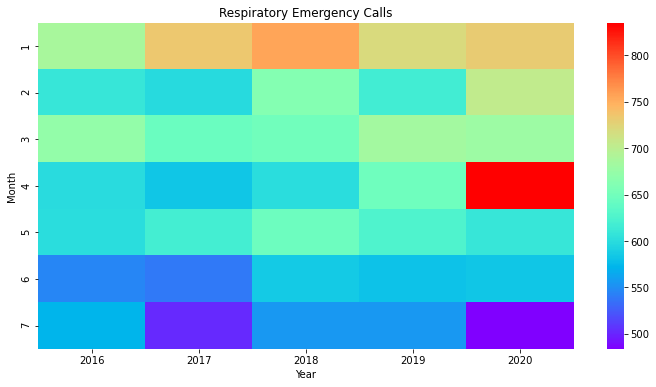

In [37]:
plt.figure(figsize=(12,6))
df_resp = df_JJ[(df_JJ['reason_detail']== ' RESPIRATORY EMERGENCY')]
resp = df_resp.groupby(by=['Month','Year']).count()['reason_detail'].unstack()
sns.heatmap(resp,cmap='rainbow')
plt.title('Respiratory Emergency Calls')

# Lockdown and assault victims

Text(0.5, 1.0, 'Assualt Victim Calls (January to July only)')

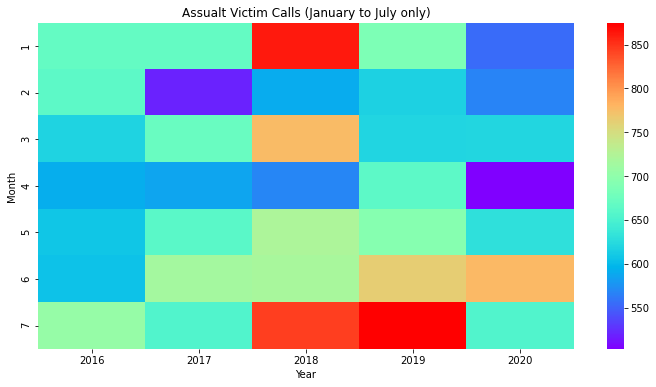

In [38]:
plt.figure(figsize=(12,6))
df_assault = df_JJ[(df_JJ['reason_detail']== ' FIRE ALARM')]
assault = df_assault.groupby(by=['Month','Year']).count()['reason_detail'].unstack()
sns.heatmap(assault,cmap='rainbow')
plt.title('Assualt Victim Calls (January to July only)')

Text(0.5, 1.0, 'Assualt Victim Calls (total)')

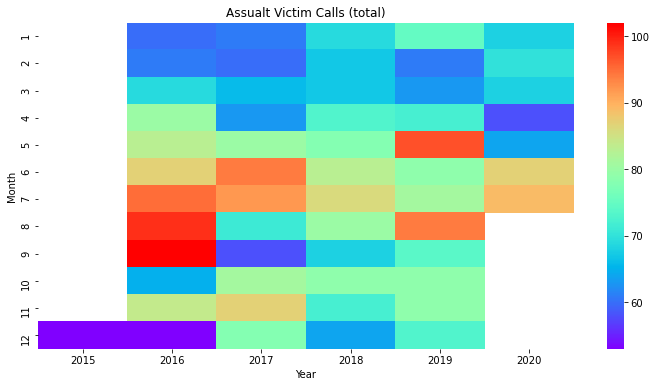

In [39]:
plt.figure(figsize=(12,6))
df_assaultT = df[(df['reason_detail']== ' ASSAULT VICTIM')]
assaultT = df_assaultT.groupby(by=['Month','Year']).count()['reason_detail'].unstack()
sns.heatmap(assaultT,cmap='rainbow')
plt.title('Assualt Victim Calls (total)')